In [40]:
#import extensions

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Nettoyage et uniformisation des données

In [41]:
#importation du CSV

df = pd.read_csv('erasmus.csv')

#Je retire la colonne INDEX
df.drop(['INDEX'], axis=1, inplace=True)
df.head()

,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT
0,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1


In [42]:
#J'affiche le type de données

df['COUNTRIES'] = df['COUNTRIES'].astype("string")
df['UNIVERSITIES'] = df['UNIVERSITIES'].astype("string")
df['FACULTIES'] = df['FACULTIES'].astype("string")
df['DEPARTMENTS'] = df['DEPARTMENTS'].astype("string")

df.dtypes

COUNTRIES        string
UNIVERSITIES     string
FACULTIES        string
DEPARTMENTS      string
EXAM SCORE      float64
GRANT             int64
dtype: object

In [43]:
#count nan values
df.isna().sum()

COUNTRIES       0
UNIVERSITIES    0
FACULTIES       0
DEPARTMENTS     2
EXAM SCORE      0
GRANT           0
dtype: int64

In [44]:
#print rows with NaN values
nanValues = df[df['DEPARTMENTS'].isna()]
nanValues

#Two rows here, both are from a computer and information sciences faculties, 
#I'll check the departements from the same faculties and see if I can change de department

,COUNTRIES,UNIVERSITIES,FACULTIES,DEPARTMENTS,EXAM SCORE,GRANT
216,DUTCH,STICHTING CHRISTELIJKE HOGESCHOOL WINDESHEIM,FACULTY OF COMPUTER AND INFORMATION SCIENCES,<NA>,76.92,0
245,FRANCE,CY CERGY PARIS UNIVERSITE,FACULTY OF COMPUTER AND INFORMATION SCIENCES,<NA>,74.27,0


In [45]:
#Remove the unwanted white spaces from rows
df['FACULTIES'] = df['FACULTIES'].str.strip()

df['FACULTIES'].unique()

<StringArray>
[                    'FACULTY OF ARTS AND SCIENCES',
                       'FACULTY OF HEALTH SCIENCES',
 'FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES',
                             'FACULTY OF EDUCATION',
                             'FACULTY OF FINE ARTS',
                           'FACULTY OF ENGINEERING',
                                   'FACULTY OF LAW',
     'FACULTY OF COMPUTER AND INFORMATION SCIENCES',
                         'FACULTY OF COMMUNICATION',
                          'FACULTY OF ARCHITECTURE',
                              'FACULTY OF MEDICINE',
                              'FACULTY OF PHARMACY',
               'GRADUATE SCHOOL OF SOCIAL SCIENCES']
Length: 13, dtype: string

In [46]:
df_final = df.dropna()
df_final.isna().sum()

COUNTRIES       0
UNIVERSITIES    0
FACULTIES       0
DEPARTMENTS     0
EXAM SCORE      0
GRANT           0
dtype: int64

In [47]:
#Show duplicates
print(df.duplicated().sum())

0


In [48]:
df_final.rename(columns={'COUNTRIES' : 'country', 'EXAM SCORE': 'exam_score', 'FACULTIES': 'faculty', 'DEPARTMENTS': 'department', 'UNIVERSITIES' : 'university', 'GRANT' : 'grant'}, inplace=True)
df_final.head(10)

C:\Users\starTech\AppData\Local\Temp\ipykernel_25744\1522723855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.rename(columns={'COUNTRIES' : 'country', 'EXAM SCORE': 'exam_score', 'FACULTIES': 'faculty', 'DEPARTMENTS': 'department', 'UNIVERSITIES' : 'university', 'GRANT' : 'grant'}, inplace=True)


,country,university,faculty,department,exam_score,grant
0,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,98.50,1
1,ITALIA,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,FACULTY OF ARTS AND SCIENCES,SOCIOLOGY,97.10,1
2,GERMAN,UNIVERSITAET BIELEFELD,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,96.80,1
3,GERMAN,HOCHSCHULE FUR ANGEWANDTE WISSENSCHAFTEN HAMBURG,FACULTY OF HEALTH SCIENCES,NUTRITION AND DIETETICS,96.50,1
4,ITALIA,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,96.32,1
5,FRANCE,INSTITUT D'ETUDES POLITIQUES D'AIX-EN-PROVENCE,FACULTY OF ECONOMICS AND ADMINISTRATIVE SCIENCES,POLITICAL SCIENCE AND INTERNATIONAL RELATIONS,96.15,1
6,FINLAND,OULUN YLIOPISTO,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,95.80,1
7,GREECE,ETHNIKO KAI KAPODISTRIAKO PANEPISTIMIO ATHINON,FACULTY OF ARTS AND SCIENCES,ENGLISH LANGUAGE AND LITERATURE,95.52,1
8,SPAIN,UNIVERSIDAD AUTONOMA DE BARCELONA,FACULTY OF ARTS AND SCIENCES,TRANSLATION AND INTERPRETING STUDIES,95.13,1
9,IRELAND,UNIVERSITY OF LIMERICK,FACULTY OF ARTS AND SCIENCES,PSYCHOLOGY,94.45,1


<Axes: ylabel='exam_score'>

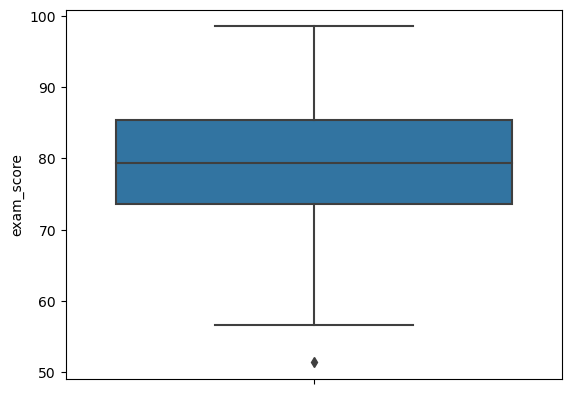

In [49]:
#Verification des valeurs aberrantes

sns.boxplot(data=df_final, y="exam_score")

# Analyse descriptives

In [50]:
# Calculer les statistiques descriptives pour la colonne des scores
descriptive_stats = df_final['exam_score'].describe()
skewness = df_final['exam_score'].skew()
kurtosis = df_final['exam_score'].kurtosis()

# Afficher les résultats
print(f"Statistiques descriptives pour la colonne exam_score:")
print(descriptive_stats)
print(f"Asymétrie (Skewness): {skewness}")
print(f"Kurtosis: {kurtosis}")

Statistiques descriptives pour la colonne exam_score:
count    339.000000
mean      79.159853
std        8.585522
min       51.400000
25%       73.560000
50%       79.320000
75%       85.325000
max       98.500000
Name: exam_score, dtype: float64
Asymétrie (Skewness): -0.22656090416246336
Kurtosis: -0.310211813006978


#### Une asymétrie de ~ -0.237 indique que les scores d'examen ont une légère tendance à s'étaler plus vers les valeurs inférieures. Cela pourrait suggérer que quelques étudiants ont des scores nettement inférieurs à la moyenne, mais ce n'est pas une tendance très prononcée.

#### Un Kurtosis de ~ -0.310 indique une distribution des scores un peu plus aplatie que la normale, indiquant une moindre concentration autour de la moyenne et moins de valeurs extrêmes. Cela signifie que les scores des étudiants sont relativement homogènes, avec moins de variations extrêmes que ce que l'on pourrait attendre dans une distribution normale.

Les prochains graphiques vont permettre de prouver ces indications

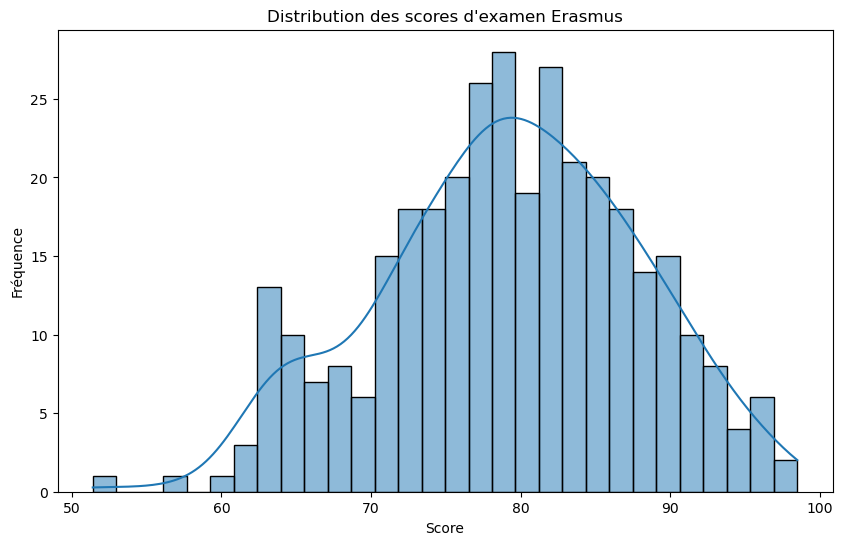

In [68]:
# Créer un histogramme et une courbe de densité pour la colonne des scores
plt.figure(figsize=(10, 6))
sns.histplot(df_final['exam_score'], kde=True, bins=30)
plt.title('Distribution des scores d\'examen Erasmus')
plt.xlabel('Score')
plt.ylabel('Fréquence')
plt.show()